In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:\\Users\\JAY\\Desktop\\Credit Card\\data_credit_card_customer_seg.csv")

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df = df.round(2)

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df['MINIMUM_PAYMENTS'].value_counts().head()

171.75    4
178.84    4
176.28    4
177.97    3
170.97    3
Name: MINIMUM_PAYMENTS, dtype: int64

In [7]:
print("Mean: "+str(round(df['MINIMUM_PAYMENTS'].mean(), 2)))
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean(), 2))

Mean: 864.21


In [8]:
df['CREDIT_LIMIT'].value_counts()

3000.00     784
1500.00     722
1200.00     621
1000.00     614
2500.00     612
           ... 
5550.00       1
7227.27       1
1250.00       1
10200.00      1
6250.00       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [9]:
print("Mean: "+str(round(df['CREDIT_LIMIT'].mean(), 2)))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean(), 2))

Mean: 4494.45


In [10]:
del df['CUST_ID']
df.shape

(8950, 17)

In [11]:
df['TOTAL_TRX'] = df['PURCHASES_TRX'] + df['CASH_ADVANCE_TRX']
df['TOTAL_TRX'].describe()

count    8950.000000
mean       17.958659
std        25.338356
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       358.000000
Name: TOTAL_TRX, dtype: float64

In [12]:
df['TOTAL_TRX'].value_counts()

1      816
2      596
12     558
3      472
4      451
      ... 
274      1
242      1
186      1
170      1
199      1
Name: TOTAL_TRX, Length: 184, dtype: int64

In [13]:
def plot(data):
    for i,j in zip(df.columns, range(len(df.columns))):
#         print("{} {}".format(i, j))

        plt.figure(figsize=(15,5))

        # 121 for 1 row, 2 columns, 1st position
        plt.subplot(121)
        sns.kdeplot(df[i])
        plt.title(i+' before scaling')

        # 122 for 1 row, 2 columns, 2nd position
        plt.subplot(122)
        sns.kdeplot(data[j])
        plt.title(i+' after scaling')

#### Standard Scaler

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-0.73198974 -0.24214335 -0.42489974 ... -0.52466626  0.36067954
  -0.6298574 ]
 [ 0.78696211  0.13735402 -0.46955188 ...  0.22713151  0.36067954
  -0.55092127]
 [ 0.44713569  0.51685139 -0.10766823 ... -0.52466626  0.36067954
  -0.23517675]
 ...
 [-0.74039748 -0.19997698 -0.40196519 ...  0.32964939 -4.12276757
  -0.51145321]
 [-0.74517307 -0.19997698 -0.46955188 ...  0.32964939 -4.12276757
  -0.6298574 ]
 [-0.57257419 -0.87463897  0.04214581 ... -0.52466626 -4.12276757
   0.2779081 ]]


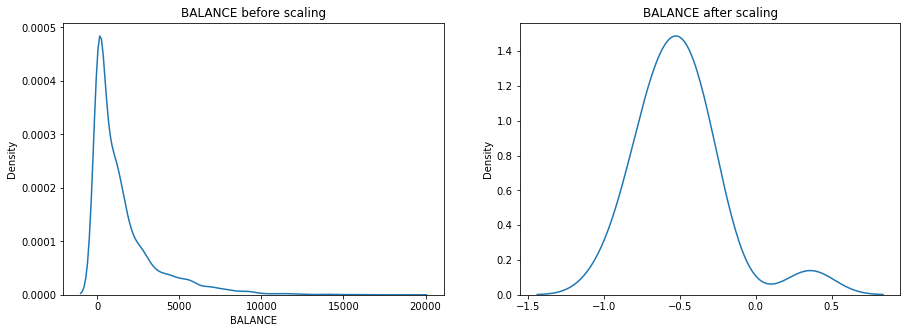

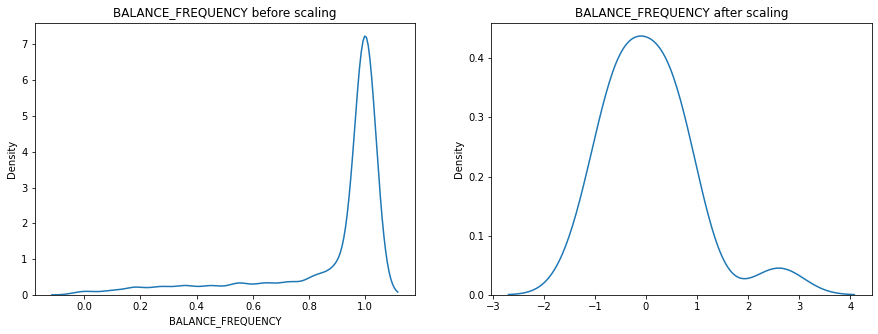

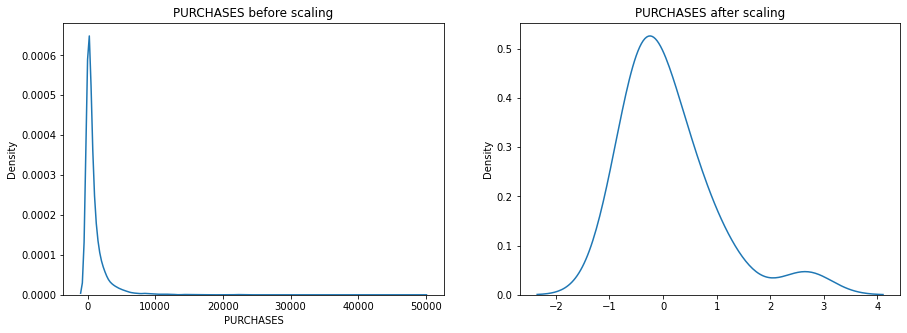

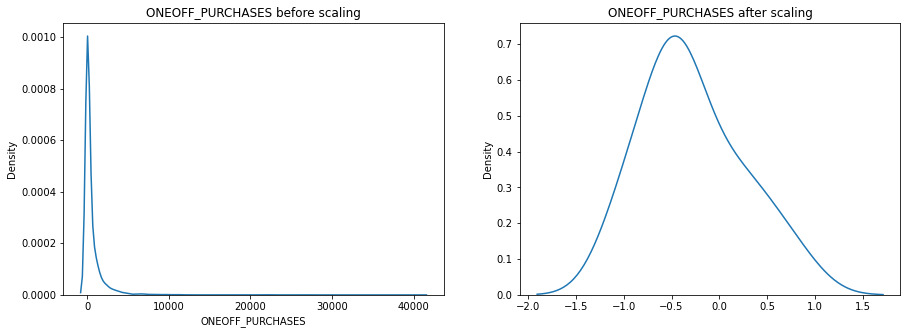

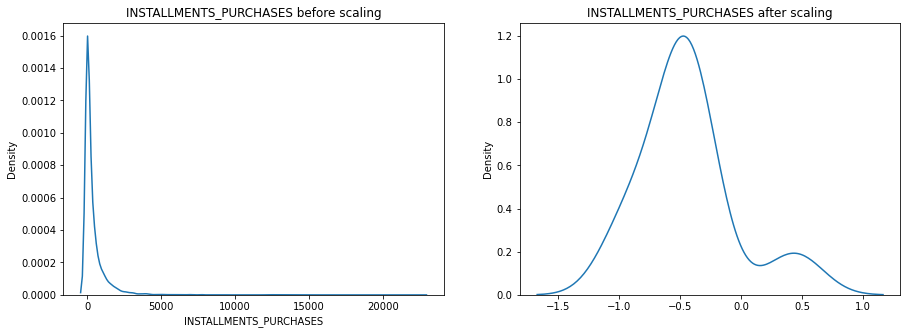

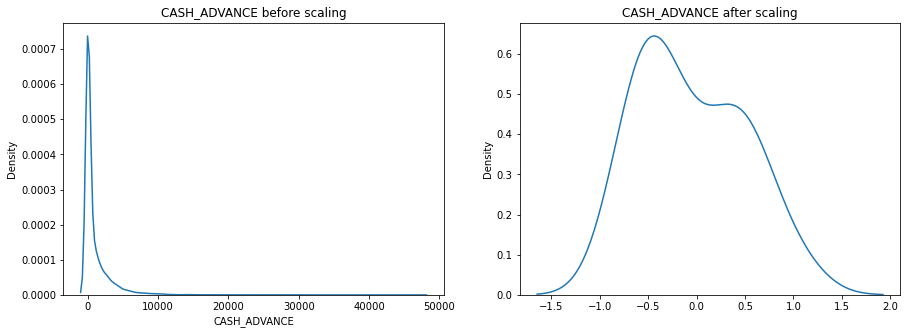

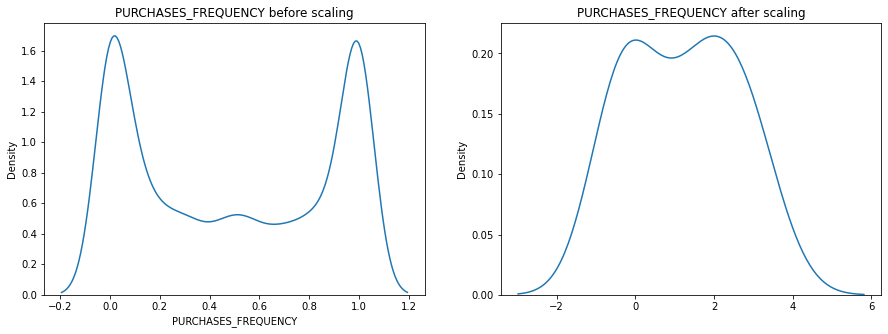

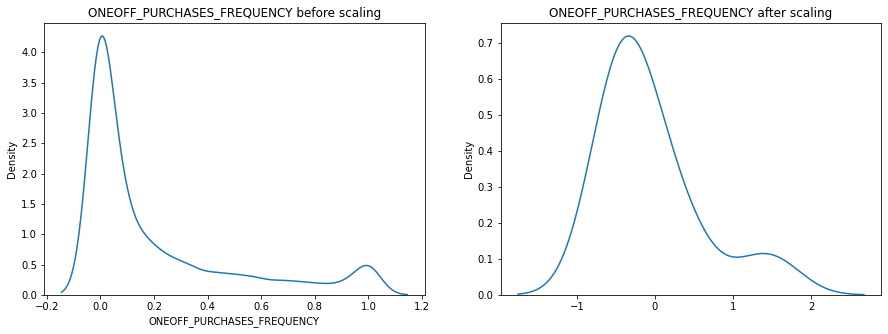

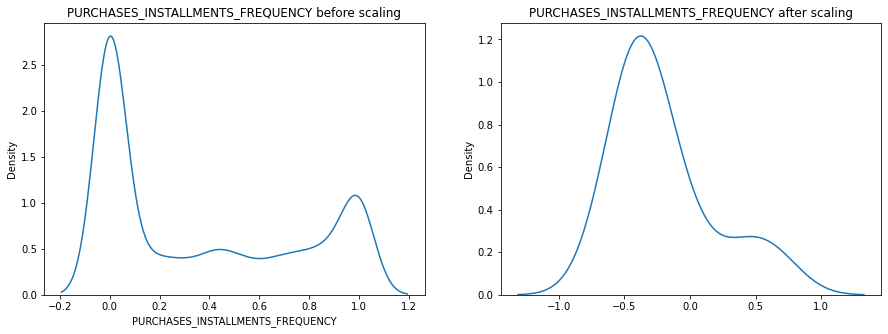

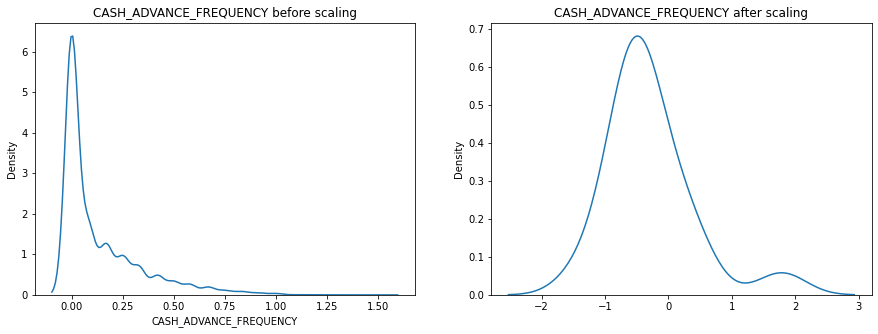

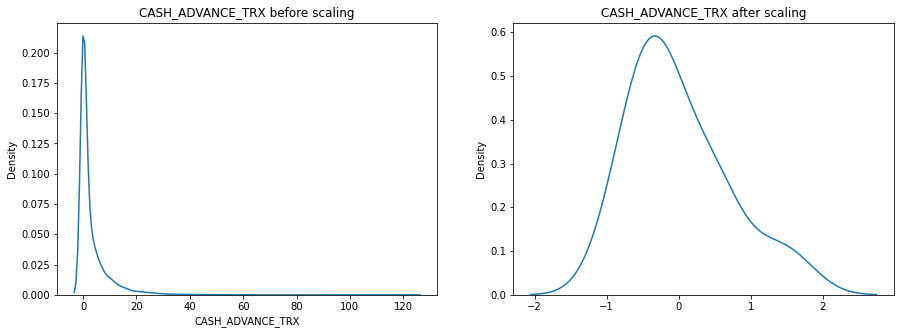

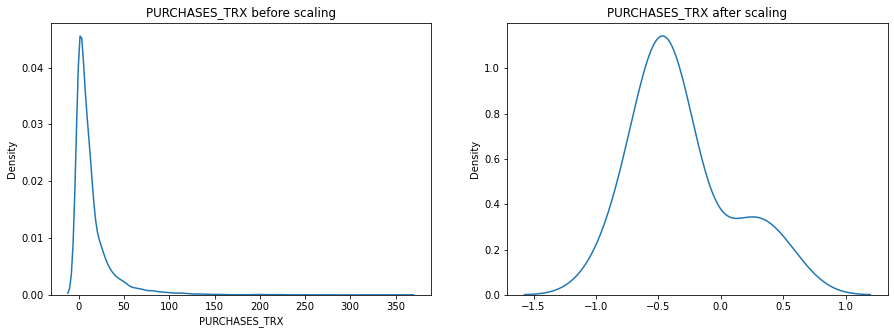

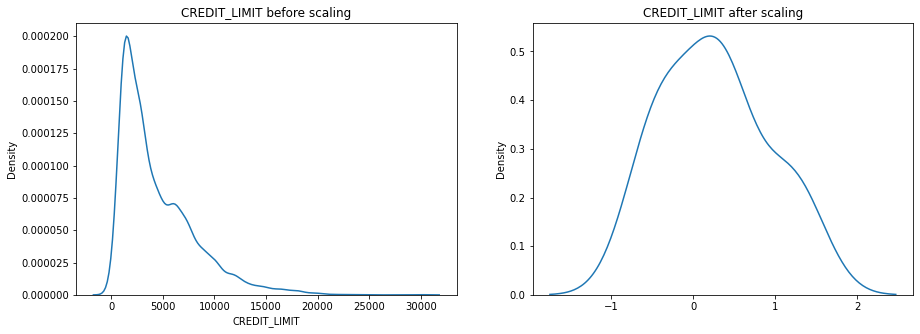

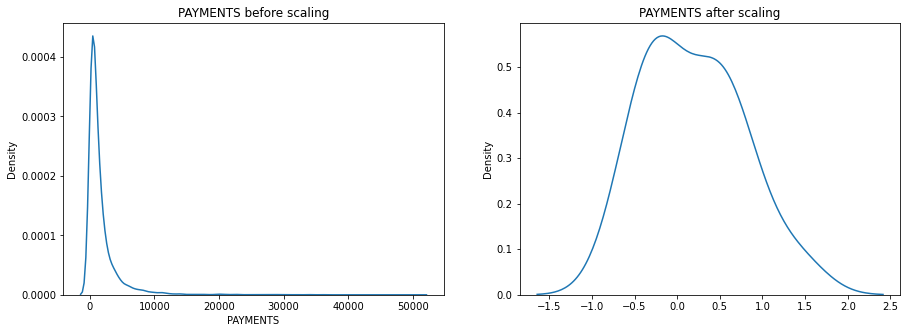

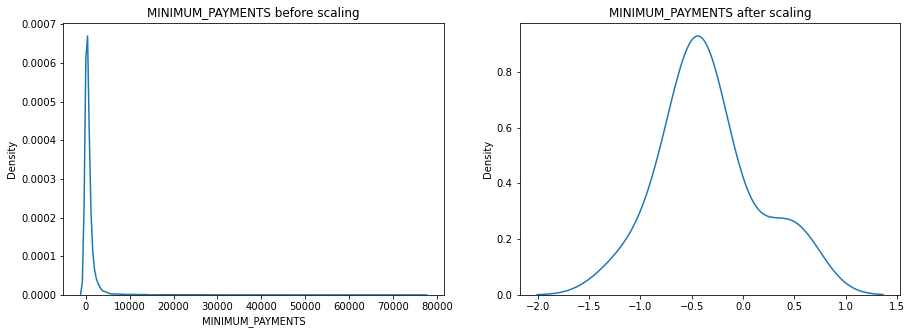

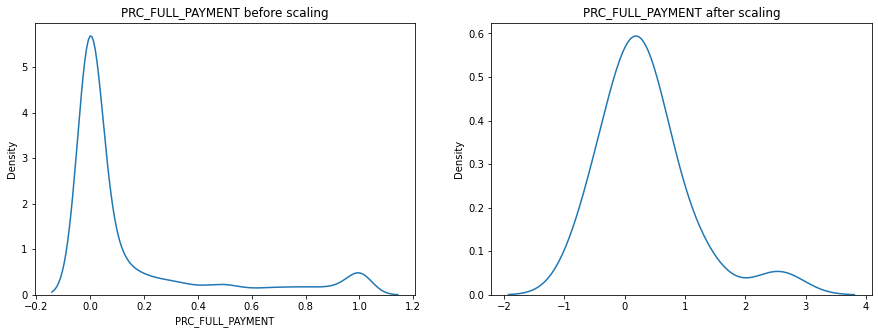

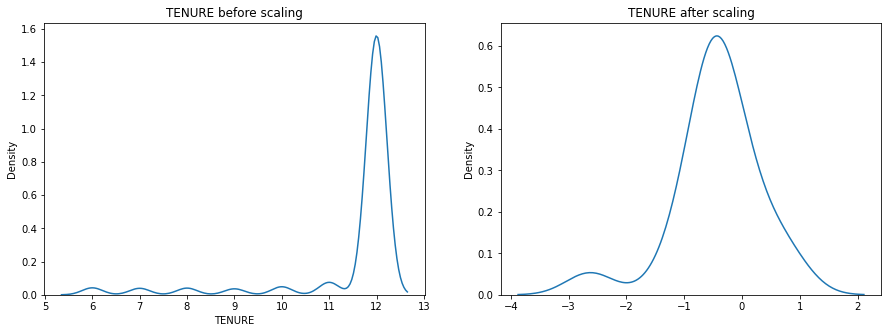

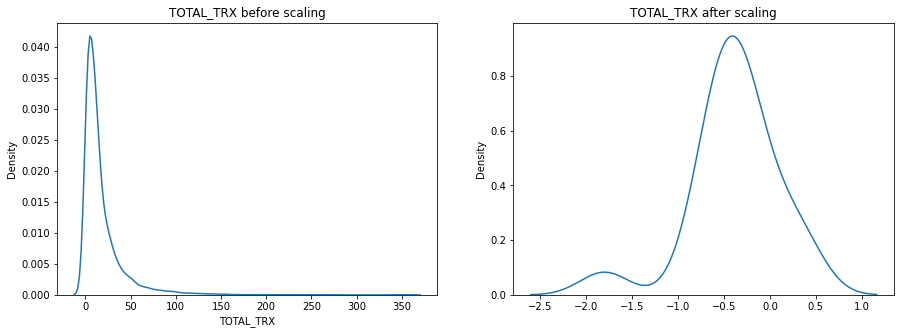

In [15]:
plot(scaled_data)

#### Min Max Scaler

In [16]:
# df1 = pd.DataFrame(scaled_data, columns=df.columns)
# df1

In [17]:
norm = normalize(scaled_data)
norm

array([[-0.301571  , -0.09976016, -0.1750536 , ..., -0.21615621,
         0.14859565, -0.2594937 ],
       [ 0.2174211 ,  0.03794803, -0.12972732, ...,  0.06275166,
         0.09964818, -0.15220797],
       [ 0.12646105,  0.14617838, -0.03045124, ..., -0.14838862,
         0.10200911, -0.06651381],
       ...,
       [-0.15606311, -0.04215172, -0.08472738, ...,  0.06948445,
        -0.86900881, -0.10780558],
       [-0.15300206, -0.04106011, -0.09641036, ...,  0.06768499,
        -0.8465039 , -0.12932496],
       [-0.11506616, -0.17576997,  0.00846974, ..., -0.10543845,
        -0.82852327,  0.05584921]])

In [18]:
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(df)
print(scaled_data2)

[[2.14775504e-03 8.20000000e-01 1.94536779e-03 ... 0.00000000e+00
  1.00000000e+00 5.58659218e-03]
 [1.68169220e-01 9.10000000e-01 0.00000000e+00 ... 2.20000000e-01
  1.00000000e+00 1.11731844e-02]
 [1.31026186e-01 1.00000000e+00 1.57662475e-02 ... 0.00000000e+00
  1.00000000e+00 3.35195531e-02]
 ...
 [1.22878895e-03 8.30000000e-01 2.94456089e-03 ... 2.50000000e-01
  0.00000000e+00 1.39664804e-02]
 [7.06816208e-04 8.30000000e-01 0.00000000e+00 ... 2.50000000e-01
  0.00000000e+00 5.58659218e-03]
 [1.95718773e-02 6.70000000e-01 2.22932216e-02 ... 0.00000000e+00
  0.00000000e+00 6.98324022e-02]]


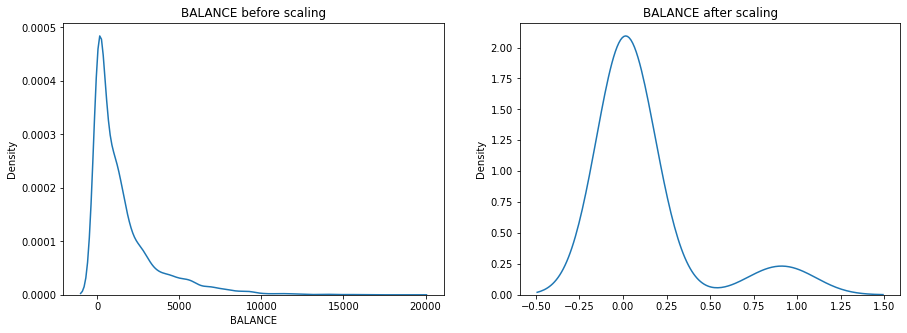

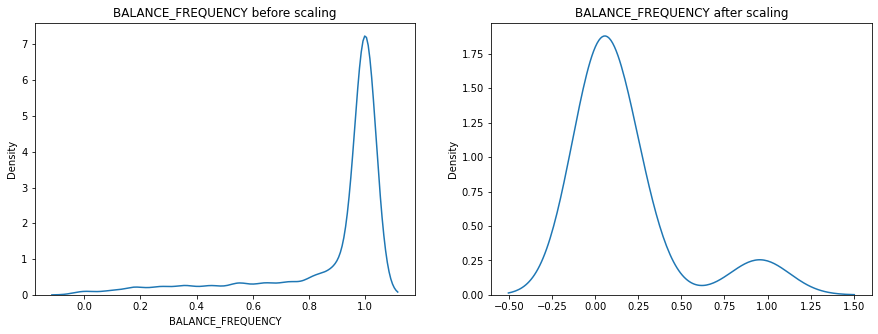

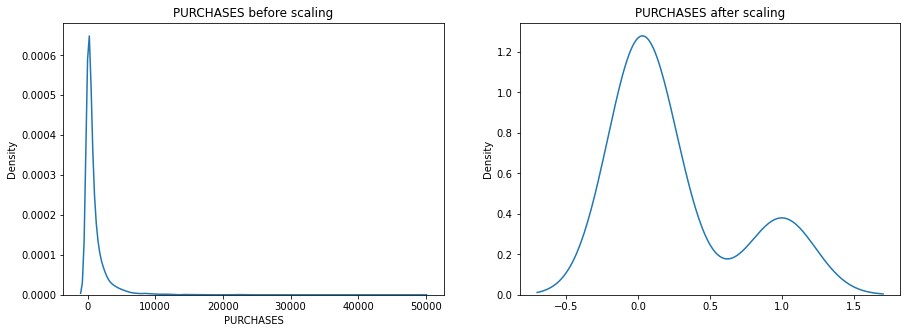

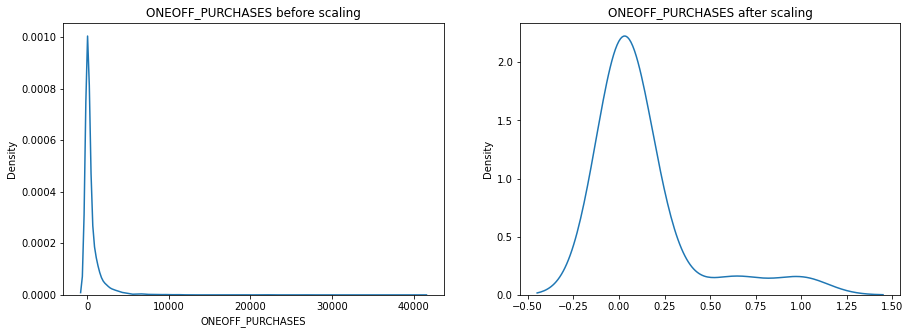

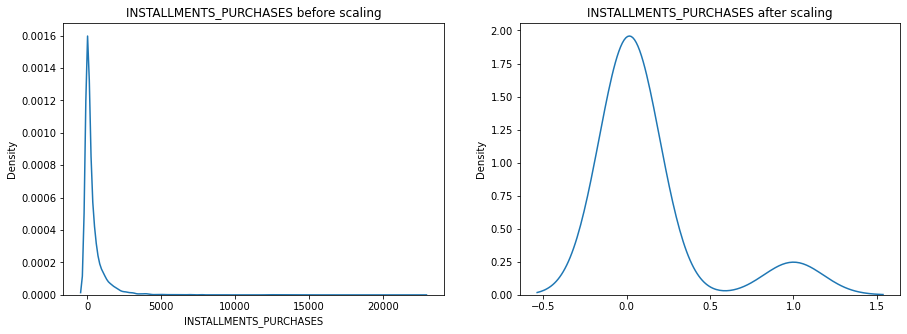

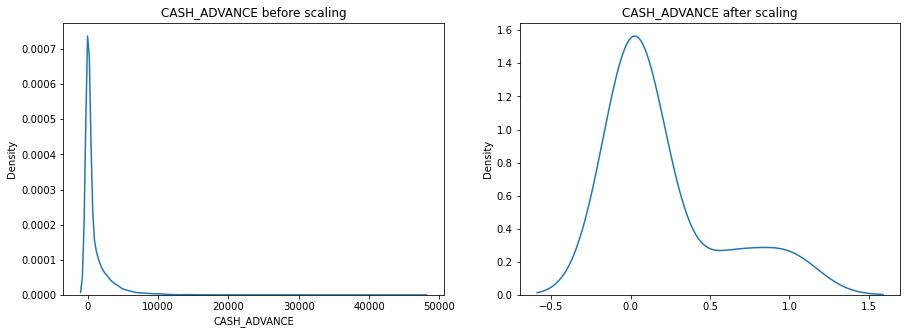

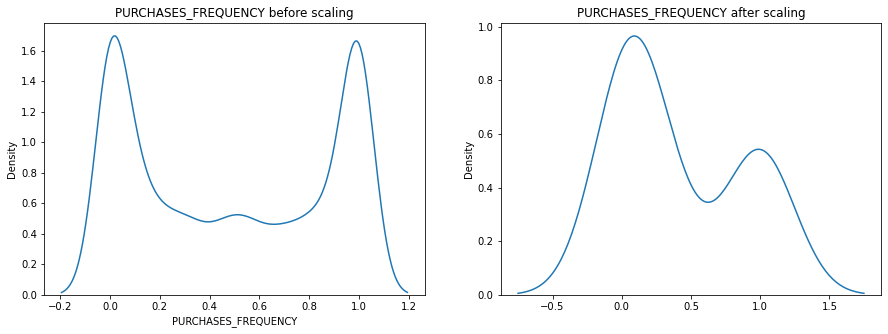

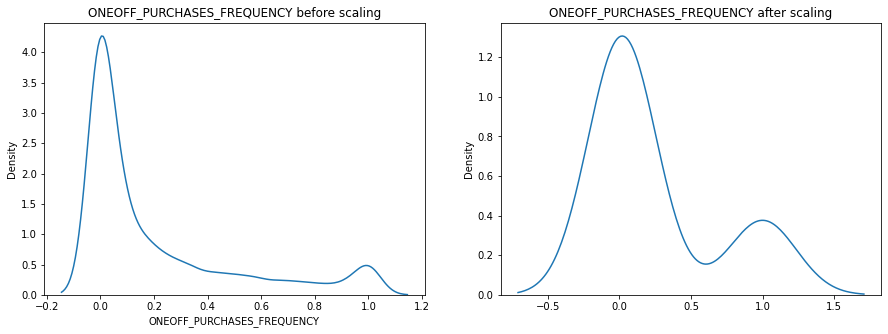

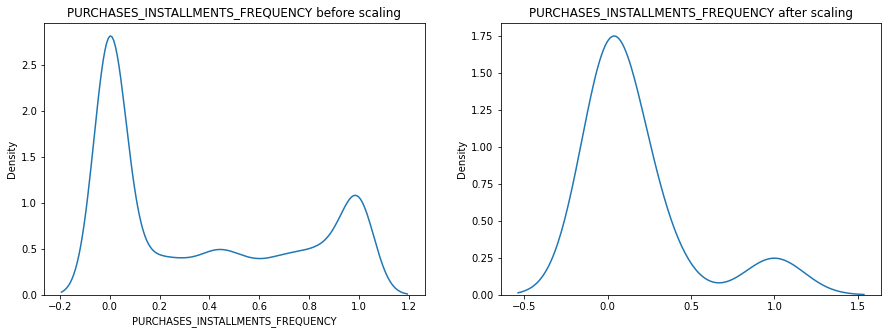

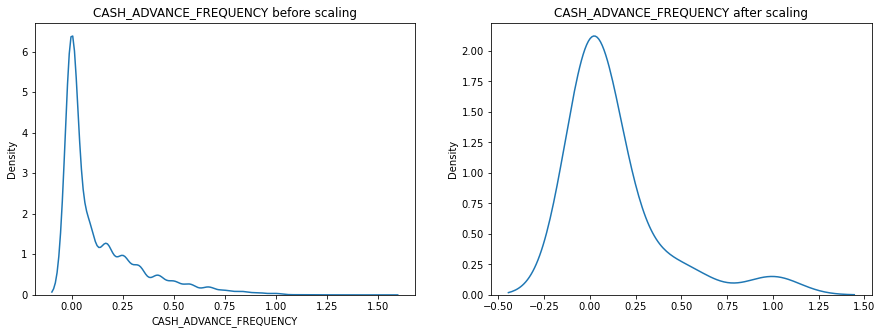

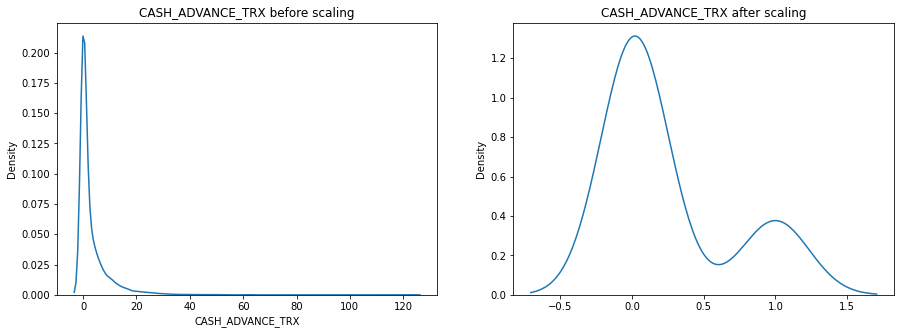

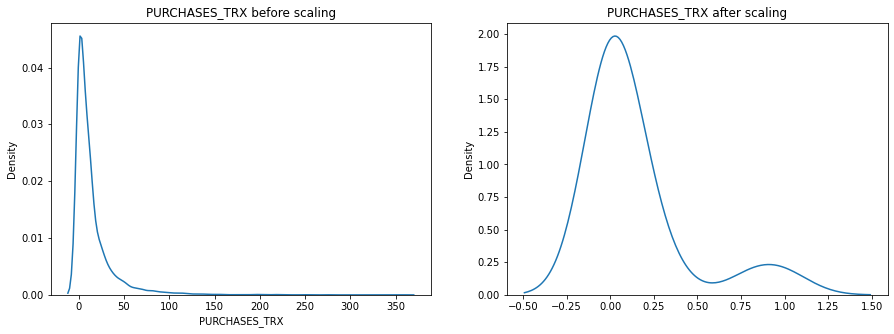

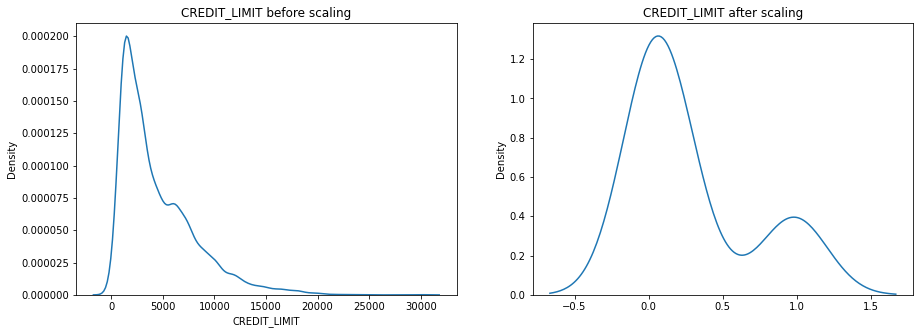

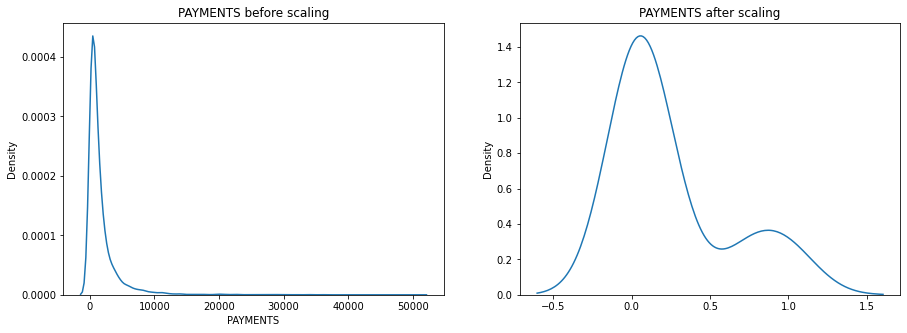

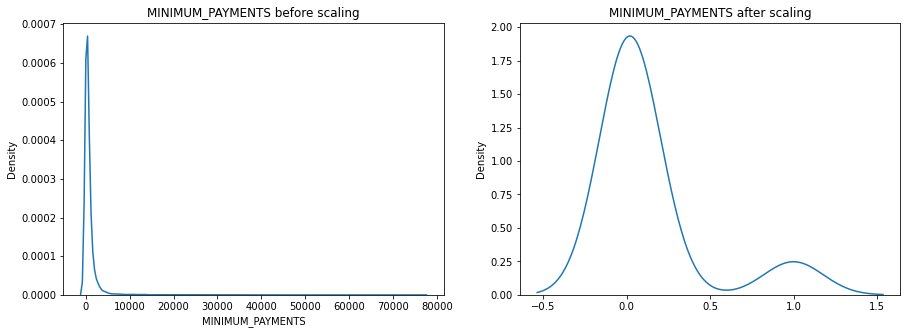

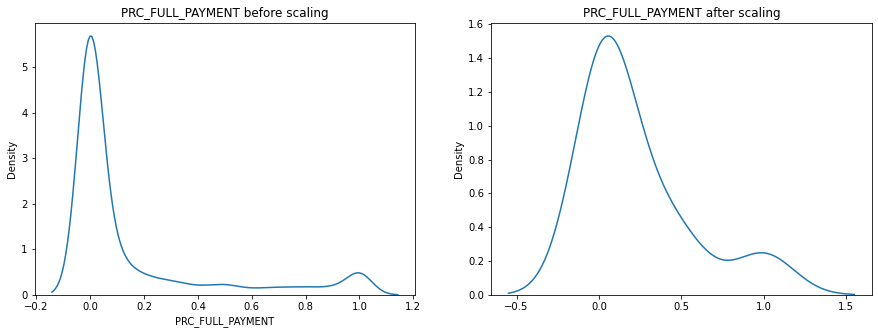

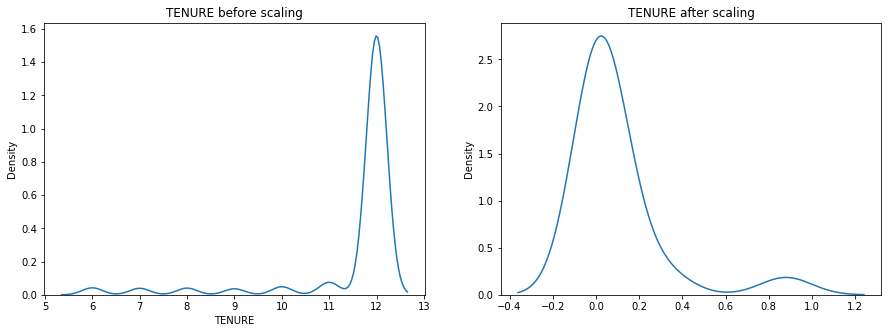

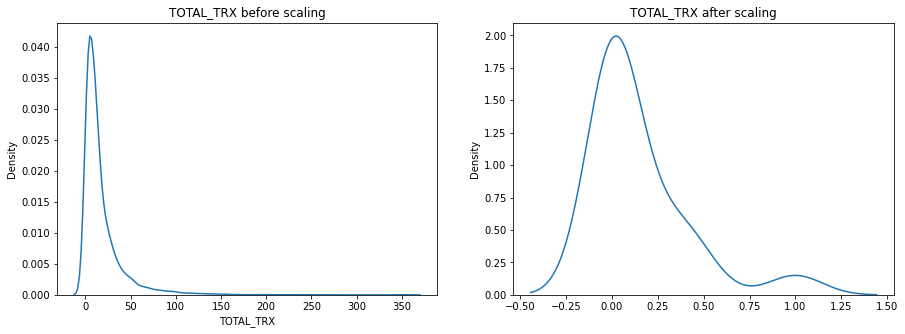

In [19]:
plot(scaled_data2)

In [20]:
scaler = QuantileTransformer()
scaled_data3 = scaler.fit_transform(df)
print(scaled_data3)

[[0.14174846 0.21421421 0.30655709 ... 0.         1.         0.12462462]
 [0.8507877  0.28278278 0.         ... 0.79079079 1.         0.23573574]
 [0.79296479 1.         0.6683165  ... 0.         1.         0.56306306]
 ...
 [0.09947207 0.23273273 0.346405   ... 0.8008008  0.         0.28378378]
 [0.06596242 0.23273273 0.         ... 0.8008008  0.         0.12462462]
 [0.36768456 0.16166166 0.74640493 ... 0.         0.         0.79429429]]


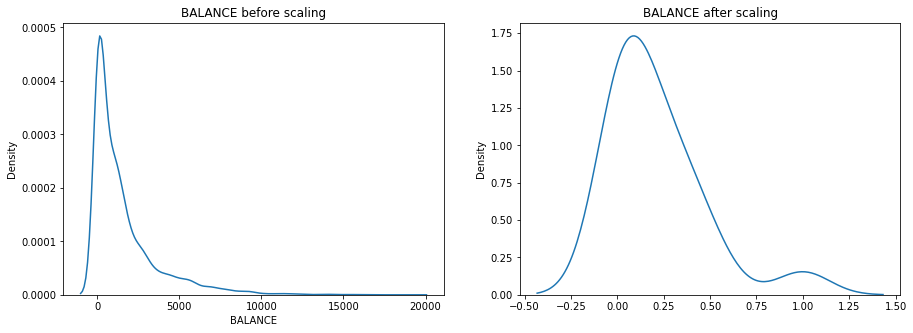

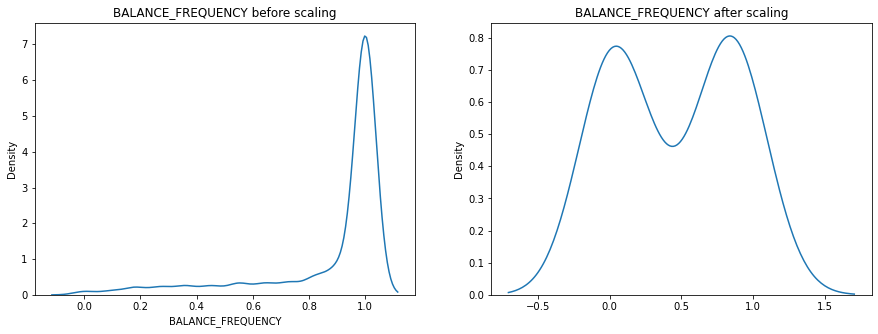

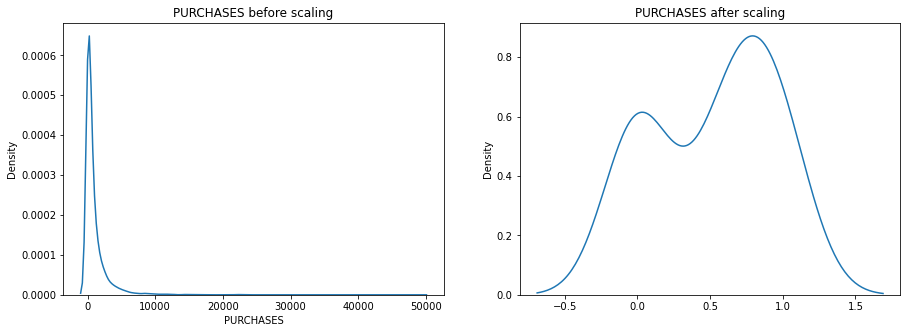

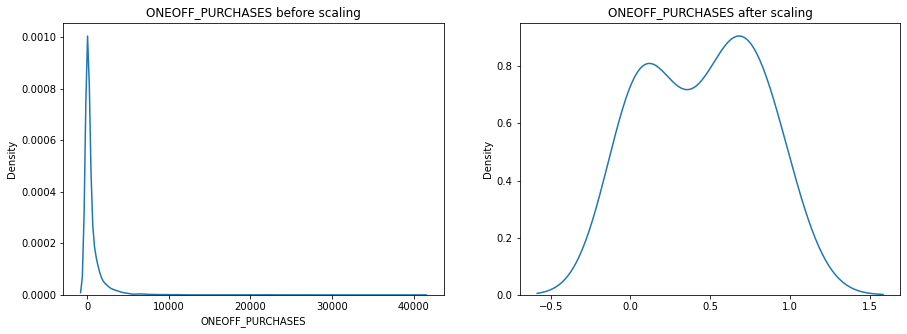

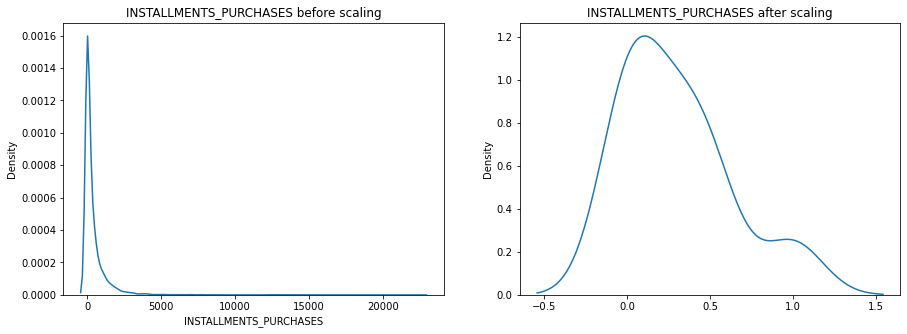

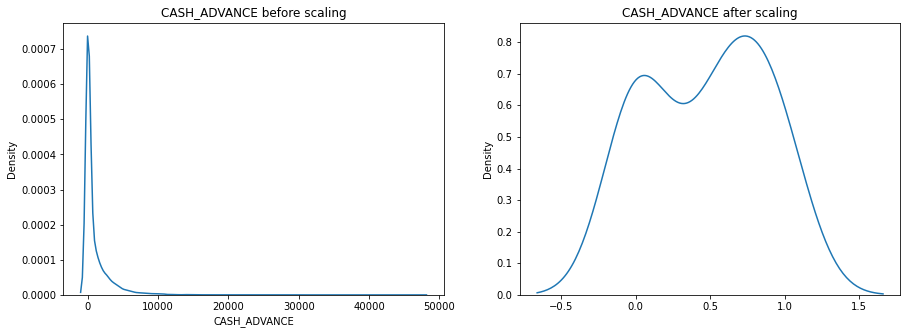

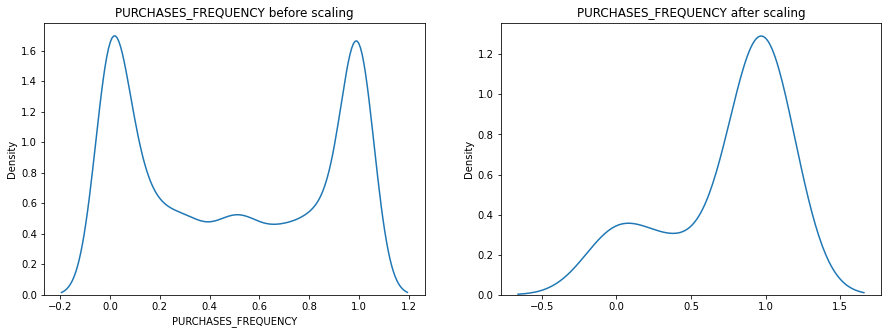

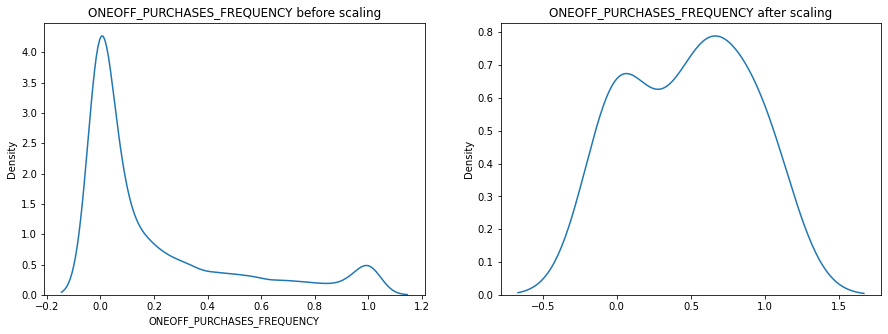

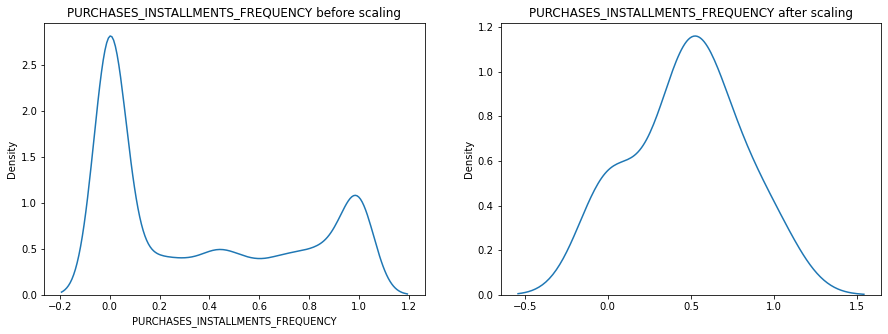

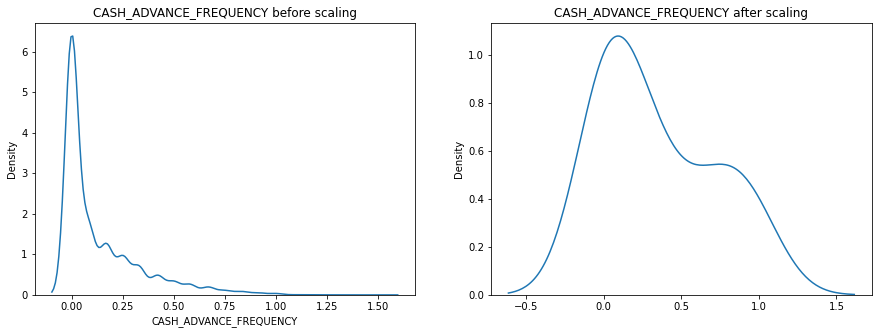

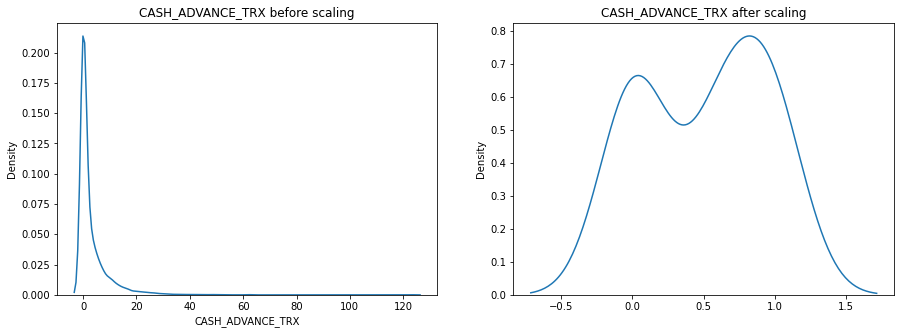

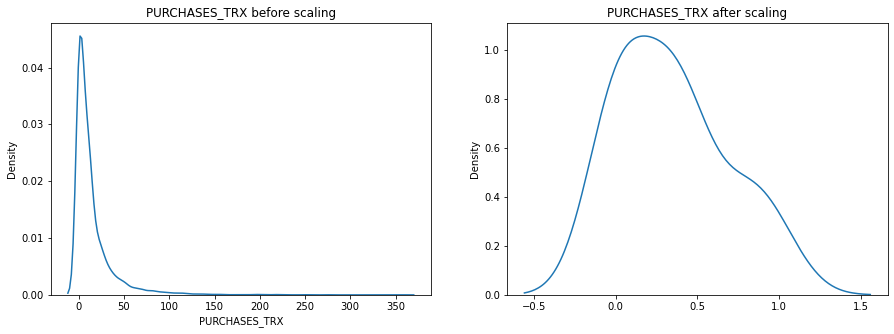

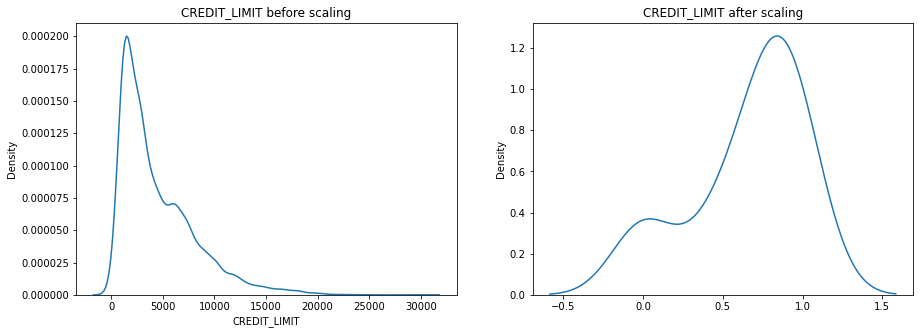

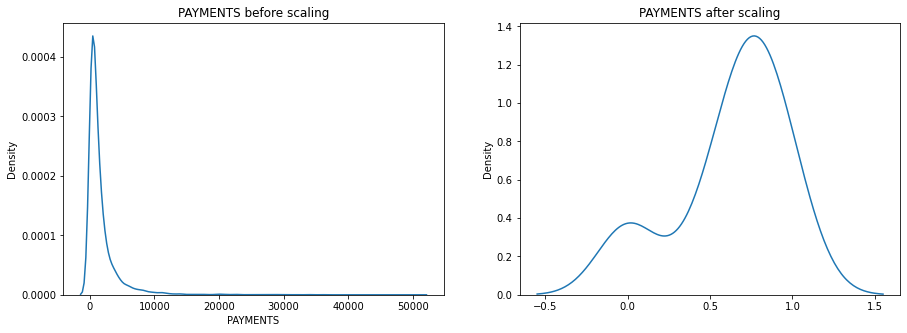

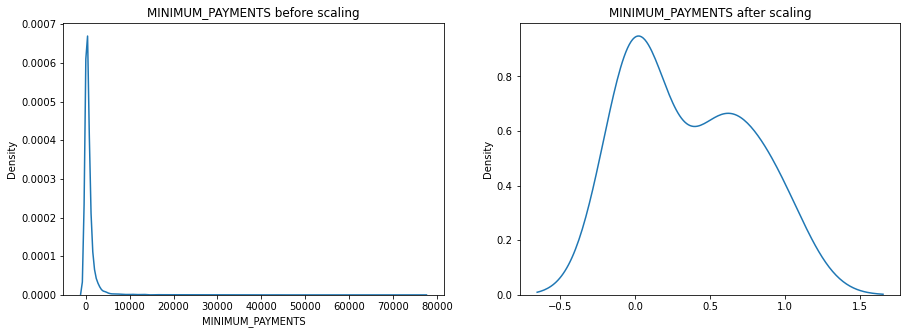

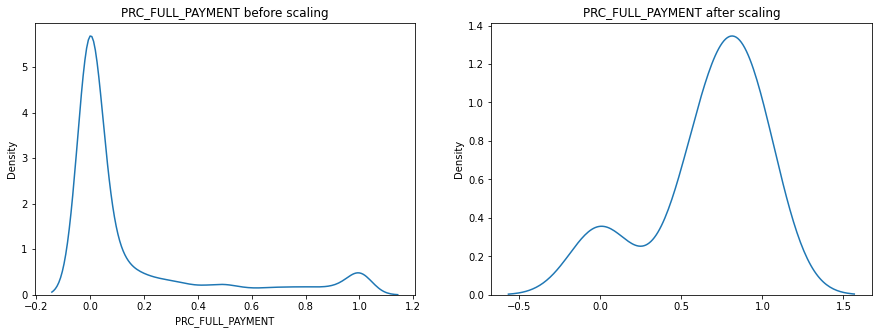

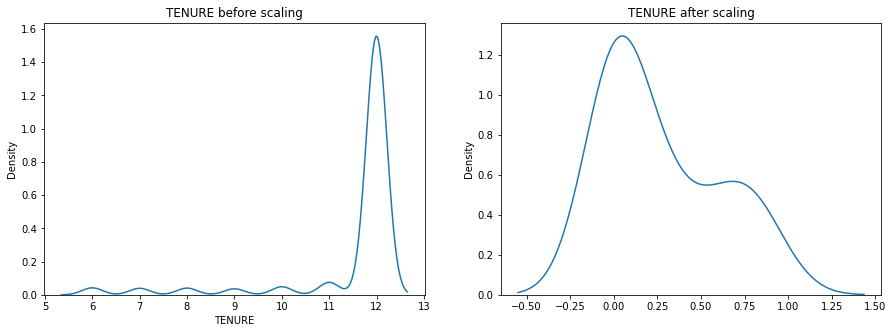

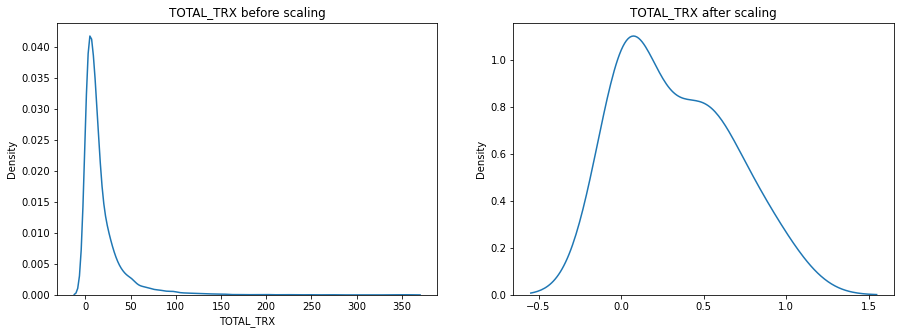

In [21]:
plot(scaled_data3)

## KMeans

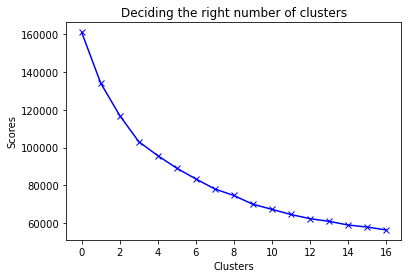

In [22]:
wcss = []

for i in range(1, 18):    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'bx-')
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

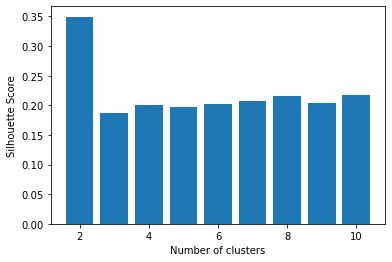

In [23]:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(scaled_data, KMeans(n_clusters = n_cluster).fit_predict(scaled_data))) 

plt.bar(range(2, 11), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

#### For n_clusters = 2

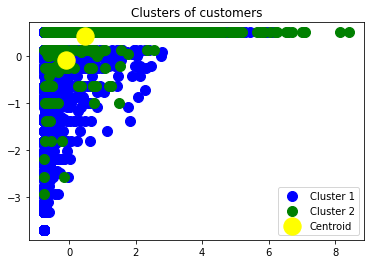

In [24]:
kmean = KMeans(2)
kmean.fit(scaled_data)
labels = kmean.labels_

kmeans = KMeans(n_clusters=2, init='k-means++')
y_predict= kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[y_predict == 0, 0], scaled_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_data[y_predict == 1, 0], scaled_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
# plt.scatter(scaled_data[y_predict == 2, 0], scaled_data[y_predict == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')
# plt.scatter(scaled_data[y_predict == 3, 0], scaled_data[y_predict == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
# plt.scatter(scaled_data[y_predict == 4, 0], scaled_data[y_predict == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
# plt.scatter(scaled_data[y_predict == 5, 0], scaled_data[y_predict == 5, 1], s = 100, c = 'violet', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [25]:
kmeans = KMeans(2)
kmeans.fit(scaled_data)
labels = kmeans.labels_

pca = PCA(n_components=2)
principal = pca.fit_transform(scaled_data)
principal

array([[-1.86498111, -0.94950199],
       [-1.12923233,  2.55469771],
       [ 0.76043575, -0.49603479],
       ...,
       [-1.1456235 , -1.73548404],
       [-2.42702624, -0.45982115],
       [-0.38580338, -0.32119726]])

In [26]:
pca_df = pd.DataFrame(data = principal, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.864981,-0.949502
1,-1.129232,2.554698
2,0.760436,-0.496035
3,-1.080592,0.070448
4,-1.792020,-0.575693


In [27]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.864981,-0.949502,1
1,-1.129232,2.554698,1
2,0.760436,-0.496035,1
3,-1.080592,0.070448,1
4,-1.792020,-0.575693,1


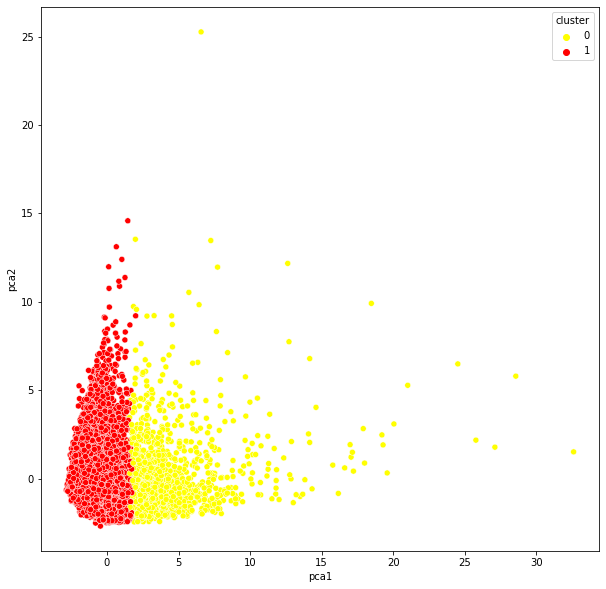

In [28]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['yellow','red'])
# ,'blue','pink','yellow','gray'
plt.show()

Notes:
1. scaling means changing range of data
2. normalization means ?
3. Applied & visualized STANDARD SCALER, MINMAX SCALER, QUANTILE TRANSFORM SCALER
4. Implemented Kmeans, silhouette & visualized clusters


1. deleted CUST_ID
2. merged PURCHASES_TRX & CASH_ADVANCE_TRX to TOTAL_TRX
3. deleted PURCHASES_TRX & CASH_ADVANCE_TRX